In [2]:
import pandas as pd
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
stopwords = stopwords.words("english")

In [3]:
df = pd.read_csv("data.csv", encoding='utf8')
rdf = pd.read_csv("reddit_politics.csv", encoding = 'utf8')
# # removing bad entries
# rdf = rdf[rdf.title != "comment"]
# newsdf = pd.read_csv("Amalgamated_Data_File.csv")
# blazedf = pd.read_csv("BlazeTV_Data_Descriptions.csv")
# blazedf['title']=blazedf['title'].astype(str) 
# cnndf = pd.read_csv("CNN_Data_Descriptions.csv")
# cnndf['title']=cnndf['title'].astype(str) 
# cnndf['title'] = cnndf['title'].str.replace('CNN', '')
# nbcdf = pd.read_csv("NBC_Data_Descriptions.csv")
# nbcdf['title']=nbcdf['title'].astype(str) 
# pbsdf = pd.read_csv("PBS_Data_Descriptions.csv")
# pbsdf['title']=pbsdf['title'].astype(str) 
# # removing bad entries
# pbsdf = pbsdf[pbsdf["title"].str.contains("Stream your PBS favorites")==False]
# fdf = pd.read_csv("FoxNews_Data_Descriptions.csv")
# fdf['title']=fdf['title'].astype(str)

In [4]:
#Cleaning Data

# removing punctuation
def remove_punct(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['no_punctuation'] = df['title'].apply(remove_punct)
df['no_punctuation']

rdf['no_punctuation'] = rdf['title'].apply(remove_punct)
rdf['no_punctuation']

# newsdf['no_punctuation'] = newsdf['title'].apply(remove_punct)
# newsdf['no_punctuation']


# blazedf['no_punctuation'] = blazedf['title'].apply(remove_punct)
# blazedf['no_punctuation']

# cnndf['no_punctuation'] = cnndf['title'].apply(remove_punct)
# cnndf['no_punctuation']

# nbcdf['no_punctuation'] = nbcdf['title'].apply(remove_punct)
# nbcdf['no_punctuation']

# pbsdf['no_punctuation'] = pbsdf['title'].apply(remove_punct)
# pbsdf['no_punctuation']

# fdf['no_punctuation'] = fdf['title'].apply(remove_punct)
# fdf['no_punctuation']



0        A Right Wing Group in Texas Is Making up Fake ...
1        DOJ sues Texas over Gov Abbott’s order for law...
2        From white evangelicals to QAnon believers who...
3        DeSantis says he’ll sign order allowing parent...
4        Show on the road In Utah Florida Gov Ron DeSan...
                               ...                        
28058                                              Comment
28059                                              Comment
28060                                              Comment
28061                                              Comment
28062                                              Comment
Name: no_punctuation, Length: 28063, dtype: object

In [5]:
df['no_punctuation_lowercase'] = df['no_punctuation'].apply(lambda x: x.lower())

rdf['no_punctuation_lowercase'] = rdf['no_punctuation'].apply(lambda x: x.lower())

# newsdf['no_punctuation_lowercase'] = newsdf['no_punctuation'].apply(lambda x: x.lower())

# blazedf['no_punctuation_lowercase'] = blazedf['no_punctuation'].apply(lambda x: x.lower())

# cnndf['no_punctuation_lowercase'] = cnndf['no_punctuation'].apply(lambda x: x.lower())

# nbcdf['no_punctuation_lowercase'] = nbcdf['no_punctuation'].apply(lambda x: x.lower())

# pbsdf['no_punctuation_lowercase'] = pbsdf['no_punctuation'].apply(lambda x: x.lower())

# fdf['no_punctuation_lowercase'] = fdf['no_punctuation'].apply(lambda x: x.lower())


In [6]:
# Removing stopwords
def remove_stopwords(text):
    global stopwords
    new = []
    #print(word_tokenize(text))
    for el in word_tokenize(text):
        if not el in stopwords:
            new.append(el)
    return ' '.join(new)

df['no_punctuation_no_stopwords'] = df['no_punctuation_lowercase'].apply(remove_stopwords)

rdf['no_punctuation_no_stopwords'] = rdf['no_punctuation_lowercase'].apply(remove_stopwords)

# newsdf['no_punctuation_no_stopwords'] = newsdf['no_punctuation_lowercase'].apply(remove_stopwords)


# blazedf['no_punctuation_no_stopwords'] = blazedf['no_punctuation_lowercase'].apply(remove_stopwords)

# cnndf['no_punctuation_no_stopwords'] = cnndf['no_punctuation_lowercase'].apply(remove_stopwords)

# nbcdf['no_punctuation_no_stopwords'] = nbcdf['no_punctuation_lowercase'].apply(remove_stopwords)

# pbsdf['no_punctuation_no_stopwords'] = pbsdf['no_punctuation_lowercase'].apply(remove_stopwords)

# fdf['no_punctuation_no_stopwords'] = fdf['no_punctuation_lowercase'].apply(remove_stopwords)


In [7]:
# Stemming words. "speaker -> speak"
def stemm(text):
    stemmer = PorterStemmer(PorterStemmer.ORIGINAL_ALGORITHM)
    new = []
    for word in word_tokenize(text):
        new.append(stemmer.stem(word))
    return ' '.join(new)

df['stemmed'] = df['no_punctuation_no_stopwords'].apply(stemm)

rdf['stemmed'] = rdf['no_punctuation_no_stopwords'].apply(stemm)

# newsdf['stemmed'] = newsdf['no_punctuation_no_stopwords'].apply(stemm)



# blazedf['stemmed'] = blazedf['no_punctuation_no_stopwords'].apply(stemm)

# cnndf['stemmed'] = cnndf['no_punctuation_no_stopwords'].apply(stemm)

# nbcdf['stemmed'] = nbcdf['no_punctuation_no_stopwords'].apply(stemm)

# pbsdf['stemmed'] = pbsdf['no_punctuation_no_stopwords'].apply(stemm)

# fdf['stemmed'] = fdf['no_punctuation_no_stopwords'].apply(stemm)

In [8]:
# Lemmatization

def lematize(text):
    stemmer = WordNetLemmatizer()
    new = []
    for word in word_tokenize(text):
        new.append(stemmer.lemmatize(word))
    return ' '.join(new)

df['lematized'] = df['no_punctuation_no_stopwords'].apply(lematize)

rdf['lematized'] = rdf['no_punctuation_no_stopwords'].apply(lematize)


# newsdf['lematized'] = newsdf['no_punctuation_no_stopwords'].apply(lematize)


# blazedf['lematized'] = blazedf['no_punctuation_no_stopwords'].apply(lematize)


# cnndf['lematized'] = cnndf['no_punctuation_no_stopwords'].apply(lematize)


# nbcdf['lematized'] = nbcdf['no_punctuation_no_stopwords'].apply(lematize)

# pbsdf['lematized'] = pbsdf['no_punctuation_no_stopwords'].apply(lematize)

# fdf['lematized'] = fdf['no_punctuation_no_stopwords'].apply(lematize)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer




# In TfidfVectorizer we consider overall document weightage
# of a word. It helps us in dealing with most frequent words.
# Using it we can penalize them. TfidfVectorizer weights the
# word counts by a measure of how often they appear in the documents.
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from plotly.offline import iplot

# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

In [44]:
# standart
import numpy as np
import pandas as pd 
from sklearn import linear_model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from numpy.random import seed
from sklearn.decomposition import PCA

seed(42)

# visualization
import matplotlib.pyplot as plt
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

# text
from googletrans import Translator
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
from string import punctuation
import re
import nltk
import math
nltk.download('stopwords')

from nltk.corpus import stopwords

# neural
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yoni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df[df['politicallean'] == "Liberal"]

,title,politicallean,score,id,subreddit,URL,numcomments,text,date,no_punctuation,no_punctuation_lowercase,no_punctuation_no_stopwords,stemmed,lematized
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1646271777,No matter who someone is how they look like wh...,no matter who someone is how they look like wh...,matter someone look like language speak wear r...,matter someon look like languag speak wear rem...,matter someone look like language speak wear r...
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1646271108,Biden speech draws 382 million US TV viewers,biden speech draws 382 million us tv viewers,biden speech draws 382 million us tv viewers,biden speech draw 382 million u tv viewer,biden speech draw 382 million u tv viewer
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1646270488,State of the union,state of the union,state union,state union,state union
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1646269508,We Should Just Give Poor People Money,we should just give poor people money,give poor people money,give poor peopl monei,give poor people money
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1646268183,Do it for the Dew,do it for the dew,dew,dew,dew
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8314,Communist Party Of Greece On Gaza Conflict,Liberal,2,7ofvq,Communist,http://www.ana.gr/anaweb/user/showplain?maindo...,0,NaN,1231475099,Communist Party Of Greece On Gaza Conflict,communist party of greece on gaza conflict,communist party greece gaza conflict,communist parti greec gaza conflict,communist party greece gaza conflict
8315,U.S. labor union hails Cuba's efforts in prote...,Liberal,3,7o6mi,Communist,http://news.xinhuanet.com/english/2009-01/08/c...,2,NaN,1231389324,US labor union hails Cubas efforts in protecti...,us labor union hails cubas efforts in protecti...,us labor union hails cubas efforts protecting ...,u labor union hail cuba effort protect peopl w...,u labor union hail cuba effort protecting peop...
8316,I've been wanting to start this reddit for a w...,Liberal,8,7nsdu,Communist,https://www.reddit.com/r/Communist/comments/7n...,1,NaN,1231262563,Ive been wanting to start this reddit for a wh...,ive been wanting to start this reddit for a wh...,ive wanting start reddit didnt want one thanks...,iv want start reddit didnt want on thank peopl...,ive wanting start reddit didnt want one thanks...
8317,"A Little Late But, ""Communist Christmas""",Liberal,2,7nn4z,Communist,http://www.rathergood.com/christmas,3,NaN,1231209931,A Little Late But Communist Christmas,a little late but communist christmas,little late communist christmas,littl late communist christma,little late communist christmas


In [12]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [13]:
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")

In [15]:
analyzer = SentimentIntensityAnalyzer()
#instantiate CountVectorizer() 

df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df['no_punctuation_no_stopwords']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df['no_punctuation_no_stopwords']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df['no_punctuation_no_stopwords']]
df['pol'] = df['politicallean'].apply(lambda x: 1 if x == "Liberal" else 0)


df['no_punctuation_no_stopwords']

0        matter someone look like language speak wear r...
1             biden speech draws 382 million us tv viewers
2                                              state union
3                                   give poor people money
4                                                      dew
                               ...                        
12849    ron paul ’ spirited defense wikileaks free inf...
12850    “ anarchocapitalism opinion doctrinal system e...
12851    mises wiki wiki project dedicated advancement ...
12852        fireman protection monopoly failed capitalism
12853                     wikipedia article better written
Name: no_punctuation_no_stopwords, Length: 12854, dtype: object

In [16]:
vectorizer =  TfidfVectorizer()
X = vectorizer.fit_transform(df['no_punctuation_no_stopwords'])
scaler = MinMaxScaler()
scaler2 = StandardScaler()
# transform data
# df['originalLength'] = df['no_punctuation_no_stopwords'].apply(lambda x: len(x))
# X_scalednums = scaler.fit_transform(df[['numcomments','score','pos','neu','neg']])


# X_scalednums2 = scaler2.fit_transform(df[['pos','neu','neg']])

# X_scalednums2 = scaler2.fit_transform(df[['neu']])
# X_scalednums2 = scaler.fit_transform(X_scalednums2)

dfx = pd.DataFrame(X.toarray())
# df2 = pd.DataFrame(X_scalednums)
# df3 = pd.DataFrame(X_scalednums2)


newDf = pd.concat([dfx], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(dfx, df['pol'], random_state = 0)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

clf_report = classification_report(y_train, y_pred)
print('Classification report on train data')
print(clf_report)

Classification report on train data
              precision    recall  f1-score   support

           0       0.97      0.53      0.69      3395
           1       0.80      0.99      0.88      6245

    accuracy                           0.83      9640
   macro avg       0.89      0.76      0.79      9640
weighted avg       0.86      0.83      0.82      9640



In [17]:
# Build a ColumnTransformer with FeatureUnion
numerical = ['score','numcomments', 'neg', 'neu', 'pos']

text = ['no_punctuation_no_stopwords']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['lematized'], df['pol'], random_state = 0)
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(X_train,y_train)
y_pred = model.predict(X_train)

clf_report = classification_report(y_train, y_pred)
scores = cross_val_score(model, X=X_train, y=y_train, cv=10, n_jobs=1)
print('Classification report on train data with only TFIDF title as feature')
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
print(clf_report)

Classification report on train data with only TFIDF title as feature
CV accuracy scores: [0.72821577 0.73547718 0.73236515 0.70850622 0.74170124 0.74273859
 0.72821577 0.74585062 0.73029046 0.72406639]
CV accuracy: 0.732 +/- 0.010
              precision    recall  f1-score   support

           0       0.96      0.54      0.69      3395
           1       0.80      0.99      0.88      6245

    accuracy                           0.83      9640
   macro avg       0.88      0.77      0.79      9640
weighted avg       0.86      0.83      0.82      9640



In [16]:
# words_stemmed = nltk.word_tokenize(df['stemmed'])
# words_lematized = nltk.word_tokenize(df['lematized'])

# All unigrams stemmed
all_unigrams_stemm = get_top_n_gram(df['stemmed'], (1,1))
all_unigrams_stemm_df = pd.DataFrame(all_unigrams_stemm, columns= ['Unigram', 'Count'])
total_num_unigrams_stemm = 0
for uni in all_unigrams_stemm:
    total_num_unigrams_stemm += uni[1]


# All bigrams stemmed
all_bigrams_stemm = get_top_n_gram(df['stemmed'], (2,2))
all_bigrams_stemm_df = pd.DataFrame(all_bigrams_stemm, columns= ['Bigram', 'Count'])
total_num_bigrams_stemm = 0
for bi in all_bigrams_stemm:
    total_num_bigrams_stemm += bi[1]
# total_num_bigrams_stemmed = all_bigrams_stemmed[1].apply(sum())

# All trigrams stemmed
all_trigrams_stemm = get_top_n_gram(df['stemmed'], (3,3))
all_trigrams_stemm_df = pd.DataFrame(all_trigrams_stemm, columns= ['Trigram', 'Count'])
total_num_trigrams_stemm = 0
for tri in all_trigrams_stemm:
    total_num_trigrams_stemm += tri[1]

# All bigrams lematized
all_bigrams_lema = get_top_n_gram(df['lematized'], (2,2))
all_bigrams_lema_df = pd.DataFrame(all_bigrams_lema, columns= ['Bigram', 'Count'])
total_num_bigrams_lema = 0
for bi in all_bigrams_lema:
    total_num_bigrams_lema += bi[1]

# All trigrams lematized
all_trigrams_lema = get_top_n_gram(df['lematized'], (3,3))
all_trigrams_lema_df = pd.DataFrame(all_trigrams_lema, columns= ['Trigram', 'Count'])
total_num_trigrams_lema = 0
for tri in all_trigrams_lema:
    total_num_trigrams_lema += tri[1]

    
# Top 300 Conservative unigrams stemmed
all_con_unigrams_stemm = get_top_n_gram(df[df['politicallean'] == "Conservative"]['stemmed'],(1,1), 100)
all_con_unigrams_stemm_df = pd.DataFrame(all_con_unigrams_stemm, columns= ['Unigram', 'Count'])
total_num_con_unigrams_stemm = 0
for uni in all_con_unigrams_stemm:
    total_num_con_unigrams_stemm += uni[1]      
    
    
# Top 300 Conservative bigrams stemmed
all_con_bigrams_stemm = get_top_n_gram(df[df['politicallean'] == "Conservative"]['stemmed'],(2,2), 100)
all_con_bigrams_stemm_df = pd.DataFrame(all_con_bigrams_stemm, columns= ['Bigram', 'Count'])
total_num_con_bigrams_stemm = 0
for bi in all_con_bigrams_stemm:
    total_num_con_bigrams_stemm += bi[1]
    
# Top 300 Conservative trigrams stemmed
all_con_trigrams_stemm = get_top_n_gram(df[df['politicallean'] == "Conservative"]['stemmed'],(3,3), 100)
all_con_trigrams_stemm_df = pd.DataFrame(all_con_trigrams_stemm, columns= ['Trigram', 'Count'])
total_num_con_trigrams_stemm = 0
for tri in all_con_trigrams_stemm:
    total_num_con_trigrams_stemm += tri[1]

# Top 300 liberal unigrams stemmed
all_lib_unigrams_stemm = get_top_n_gram(df[df['politicallean'] == "Liberal"]['stemmed'],(1,1), 100)
all_lib_unigrams_stemm_df = pd.DataFrame(all_lib_unigrams_stemm, columns= ['Unigram', 'Count'])
total_num_lib_unigrams_stemm = 0
for uni in all_lib_unigrams_stemm:
    total_num_lib_unigrams_stemm += uni[1]    
    
# Top 300 liberal bigrams stemmed
all_lib_bigrams_stemm = get_top_n_gram(df[df['politicallean'] == "Liberal"]['stemmed'],(2,2), 100)
all_lib_bigrams_stemm_df = pd.DataFrame(all_lib_bigrams_stemm, columns= ['Bigram', 'Count'])
total_num_lib_bigrams_stemm = 0
for bi in all_lib_bigrams_stemm:
    total_num_lib_bigrams_stemm += bi[1]
    
# Top 300 Liberal trigrams stemmed
all_lib_trigrams_stemm = get_top_n_gram(df[df['politicallean'] == "Liberal"]['stemmed'],(3,3), 100)
all_lib_trigrams_stemm_df = pd.DataFrame(all_lib_trigrams_stemm, columns= ['Trigram', 'Count'])
total_num_lib_trigrams_stemm = 0
for tri in all_lib_trigrams_stemm:
    total_num_lib_trigrams_stemm += tri[1]

# # Top 10 conservative bigrams lematized
# all_con_bigrams_lema = get_top_n_gram(df[df['politicallean'] == "Conservative"]['lematized'],(2,2), 10)
# all_con_bigrams_lema_df = pd.DataFrame(all_con_bigrams_lema, columns= ['Bigram', 'Count'])
# total_num_con_bigrams_lema = 0
# for bi in all_con_bigrams_lema:
#     total_num_con_bigrams_lema += bi[1]
    
# # Top 10 liberal bigrams lematized
# all_lib_bigrams_lema = get_top_n_gram(df[df['politicallean'] == "Liberal"]['lematized'],(2,2), 10)
# all_lib_bigrams_lema_df = pd.DataFrame(all_lib_bigrams_lema, columns= ['Bigram', 'Count'])
# total_num_lib_bigrams_lema = 0
# for bi in all_lib_bigrams_lema:
#     total_num_lib_bigrams_lema += bi[1]


In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [23]:
vectorizer =  TfidfVectorizer()
vectorizer2 = CountVectorizer(ngram_range=(2,3), max_features = 100)
X = vectorizer.fit_transform(df['lematized'])
X2 = vectorizer2.fit_transform(df['lematized'])
scaler = MinMaxScaler()
scaler2 = StandardScaler()
# transform data
# df['originalLength'] = df['no_punctuation_no_stopwords'].apply(lambda x: len(x))
X_scalednums = scaler.fit_transform(df[['numcomments','score']])
X_scalednums2 = scaler2.fit_transform(df[['pos','neg']])
X_scalednums2 = scaler.fit_transform(X_scalednums2)

dfx = pd.DataFrame(X.toarray())
dfx2 = pd.DataFrame(X2.toarray())
df2 = pd.DataFrame(X_scalednums)
df3 = pd.DataFrame(X_scalednums2)


newDf = pd.concat([dfx,dfx2,df2,df3], axis = 1)




# X_train, X_test, y_train, y_test = train_test_split(newDf, df['pol'], random_state = 0)
# model = MultinomialNB()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_train)

# clf_report = classification_report(y_train, y_pred)


In [56]:

estimators = [("tf_idf", TfidfVectorizer()),
             ("ridge", linear_model.RidgeClassifier())]
model = Pipeline(estimators)
model.fit(df['lematized'],df['pol'])


Pipeline(steps=[('tf_idf', TfidfVectorizer()), ('ridge', RidgeClassifier())])

In [83]:
params = {"ridge__alpha":[1, 1.5, 2, 2.5, 3], #regularization param
          "tf_idf__min_df": [1, 3, 10], #min count of words allowed
          "tf_idf__ngram_range": [(1,1), (1,2), (1,3)], #1-grams, 2-grams, or 3-grams
          "tf_idf__stop_words": [None, "english"]} #use stopwords or don't
grid1 = GridSearchCV(estimator=model, param_grid = params, scoring = "neg_mean_squared_error")
grid1.fit(df['no_punctuation'],df['pol'])
grid1.best_params_

{'ridge__alpha': 2,
 'tf_idf__min_df': 1,
 'tf_idf__ngram_range': (1, 2),
 'tf_idf__stop_words': 'english'}

In [84]:
params = pd.DataFrame([i[0] for i in  grid1.cv_results_])
results = pd.DataFrame( grid1.cv_results_)
results = pd.concat([params, results], 1)
results.head(3)
results.groupby(["param_ridge__alpha"])["mean_test_score"].aggregate([np.mean])

,mean
param_ridge__alpha,
1.0,-0.298351
1.5,-0.295802
2.0,-0.294324
2.5,-0.293853
3.0,-0.294575


In [111]:
#Examining the Best Model:

model = grid1.best_estimator_


ridge_model = model.named_steps["ridge"]
tf_idf_model = model.named_steps["tf_idf"]

#,"coef":ridge_model.coef_
model.predict(df['no_punctuation'])
coefficients = pd.DataFrame({"names":tf_idf_model.get_feature_names(), "coef": ridge_model.coef_[0]})


coefficients.sort_values("coef", ascending=False).head(30)


,names,coef
86427,women,1.821142
86940,workers,1.408554
54477,opinion,1.261292
19832,cuba,1.198405
29900,feminist,1.180107
25167,dsa,1.115442
57787,plan,1.083380
72369,solidarity,1.003841
41208,jan,0.982875
26022,election,0.977928


In [89]:
grid1.best_estimator_.named_steps["ridge"].coef_
ridge_model = model.named_steps["ridge"]
tf_idf_model = model.named_steps["tf_idf"]

array([[0.16155789, 0.03799029, 0.13056396, ..., 0.10011758, 0.03022519,
        0.03022519]])

In [85]:
params = {"ridge__alpha":[1, 1.5, 2, 2.5, 3], #regularization param
          "tf_idf__min_df": [1, 3, 10], #min count of words allowed
          "tf_idf__ngram_range": [(1,1), (1,2), (1,3)], #1-grams, 2-grams, or 3-grams
          "tf_idf__stop_words": [None],
         "tf_idf__use_idf":[True, False]} # tfidf or don't
# use neg mean squared error becuse mse is maximized
grid2 = GridSearchCV(estimator=model, param_grid = params, scoring = "neg_mean_squared_error")
grid2.fit(df['lematized'],df['pol'])
grid2.best_params_

{'ridge__alpha': 2,
 'tf_idf__min_df': 1,
 'tf_idf__ngram_range': (1, 2),
 'tf_idf__stop_words': None,
 'tf_idf__use_idf': True}

In [86]:
params = pd.DataFrame([i[0] for i in  grid2.cv_results_])
results = pd.DataFrame( grid2.cv_results_)
results = pd.concat([params, results], 1)
results.head(3)
results.groupby(["param_ridge__alpha"])["mean_test_score"].aggregate([np.mean])

,mean
param_ridge__alpha,
1.0,-0.299255
1.5,-0.296497
2.0,-0.294764
2.5,-0.294332
3.0,-0.294121


In [112]:
#Examining the Best Model:

model = grid2.best_estimator_


ridge_model = model.named_steps["ridge"]
tf_idf_model = model.named_steps["tf_idf"]

#,"coef":ridge_model.coef_
model.predict(df['no_punctuation'])
coefficients = pd.DataFrame({"names":tf_idf_model.get_feature_names(), "coef": ridge_model.coef_[0]})


coefficients.sort_values("coef", ascending=False).head(30)

,names,coef
86940,woman,1.688140
87421,worker,1.482456
30005,feminist,1.394371
55136,opinion,1.196362
20172,cuba,1.186560
25055,dsa,1.107344
25957,election,1.047140
72821,solidarity,0.974843
41579,jan,0.949329
75217,strike,0.927074


In [28]:
# Lasso regression, feature selection

X_train, X_test, y_train, y_test = train_test_split(newDf, df['pol'], random_state = 0)
pipeline = Pipeline([
    ('model',Lasso())
])

search = GridSearchCV(pipeline,
                     {'model__alpha':np.arange(0.1, 10, 0.1)},
                     cv= 5,
                     scoring="neg_mean_squared_error", verbose=3)
search.fit(X_train, y_train)
search.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.232 total time=   1.7s
[CV 2/5] END .................model__alpha=0.1;, score=-0.225 total time=   1.8s
[CV 3/5] END .................model__alpha=0.1;, score=-0.232 total time=   1.8s
[CV 4/5] END .................model__alpha=0.1;, score=-0.225 total time=   1.8s
[CV 5/5] END .................model__alpha=0.1;, score=-0.227 total time=   1.8s
[CV 1/5] END .................model__alpha=0.2;, score=-0.232 total time=   1.8s
[CV 2/5] END .................model__alpha=0.2;, score=-0.225 total time=   1.8s
[CV 3/5] END .................model__alpha=0.2;, score=-0.232 total time=   1.8s
[CV 4/5] END .................model__alpha=0.2;, score=-0.225 total time=   1.8s
[CV 5/5] END .................model__alpha=0.2;, score=-0.227 total time=   1.8s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.232 total time=   1.8s
[CV 2/5] END .model__alpha=0.30000000000000004;

[CV 2/5] END .................model__alpha=2.1;, score=-0.225 total time=   1.8s
[CV 3/5] END .................model__alpha=2.1;, score=-0.232 total time=   1.9s
[CV 4/5] END .................model__alpha=2.1;, score=-0.225 total time=   1.9s
[CV 5/5] END .................model__alpha=2.1;, score=-0.227 total time=   1.8s
[CV 1/5] END .................model__alpha=2.2;, score=-0.232 total time=   1.9s
[CV 2/5] END .................model__alpha=2.2;, score=-0.225 total time=   1.8s
[CV 3/5] END .................model__alpha=2.2;, score=-0.232 total time=   1.9s
[CV 4/5] END .................model__alpha=2.2;, score=-0.225 total time=   1.9s
[CV 5/5] END .................model__alpha=2.2;, score=-0.227 total time=   1.8s
[CV 1/5] END ..model__alpha=2.3000000000000003;, score=-0.232 total time=   1.9s
[CV 2/5] END ..model__alpha=2.3000000000000003;, score=-0.225 total time=   1.8s
[CV 3/5] END ..model__alpha=2.3000000000000003;, score=-0.232 total time=   1.8s
[CV 4/5] END ..model__alpha=

[CV 4/5] END .................model__alpha=4.1;, score=-0.225 total time=   1.8s
[CV 5/5] END .................model__alpha=4.1;, score=-0.227 total time=   1.8s
[CV 1/5] END .................model__alpha=4.2;, score=-0.232 total time=   1.8s
[CV 2/5] END .................model__alpha=4.2;, score=-0.225 total time=   1.8s
[CV 3/5] END .................model__alpha=4.2;, score=-0.232 total time=   1.8s
[CV 4/5] END .................model__alpha=4.2;, score=-0.225 total time=   1.8s
[CV 5/5] END .................model__alpha=4.2;, score=-0.227 total time=   1.8s
[CV 1/5] END .................model__alpha=4.3;, score=-0.232 total time=   1.8s
[CV 2/5] END .................model__alpha=4.3;, score=-0.225 total time=   1.8s
[CV 3/5] END .................model__alpha=4.3;, score=-0.232 total time=   1.9s
[CV 4/5] END .................model__alpha=4.3;, score=-0.225 total time=   1.8s
[CV 5/5] END .................model__alpha=4.3;, score=-0.227 total time=   1.8s
[CV 1/5] END ..model__alpha=

[CV 1/5] END .................model__alpha=6.2;, score=-0.232 total time=   1.9s
[CV 2/5] END .................model__alpha=6.2;, score=-0.225 total time=   1.9s
[CV 3/5] END .................model__alpha=6.2;, score=-0.232 total time=   1.8s
[CV 4/5] END .................model__alpha=6.2;, score=-0.225 total time=   1.8s
[CV 5/5] END .................model__alpha=6.2;, score=-0.227 total time=   1.9s
[CV 1/5] END .................model__alpha=6.3;, score=-0.232 total time=   1.8s
[CV 2/5] END .................model__alpha=6.3;, score=-0.225 total time=   1.8s
[CV 3/5] END .................model__alpha=6.3;, score=-0.232 total time=   1.9s
[CV 4/5] END .................model__alpha=6.3;, score=-0.225 total time=   1.8s
[CV 5/5] END .................model__alpha=6.3;, score=-0.227 total time=   1.9s
[CV 1/5] END .................model__alpha=6.4;, score=-0.232 total time=   1.9s
[CV 2/5] END .................model__alpha=6.4;, score=-0.225 total time=   1.9s
[CV 3/5] END ...............

[CV 3/5] END .................model__alpha=8.2;, score=-0.232 total time=   1.8s
[CV 4/5] END .................model__alpha=8.2;, score=-0.225 total time=   1.9s
[CV 5/5] END .................model__alpha=8.2;, score=-0.227 total time=   1.9s
[CV 1/5] END .................model__alpha=8.3;, score=-0.232 total time=   1.9s
[CV 2/5] END .................model__alpha=8.3;, score=-0.225 total time=   1.9s
[CV 3/5] END .................model__alpha=8.3;, score=-0.232 total time=   1.9s
[CV 4/5] END .................model__alpha=8.3;, score=-0.225 total time=   1.9s
[CV 5/5] END .................model__alpha=8.3;, score=-0.227 total time=   1.9s
[CV 1/5] END .................model__alpha=8.4;, score=-0.232 total time=   1.8s
[CV 2/5] END .................model__alpha=8.4;, score=-0.225 total time=   1.8s
[CV 3/5] END .................model__alpha=8.4;, score=-0.232 total time=   1.9s
[CV 4/5] END .................model__alpha=8.4;, score=-0.225 total time=   1.9s
[CV 5/5] END ...............

{'model__alpha': 0.1}

In [42]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
(importance > 0).sum()



0

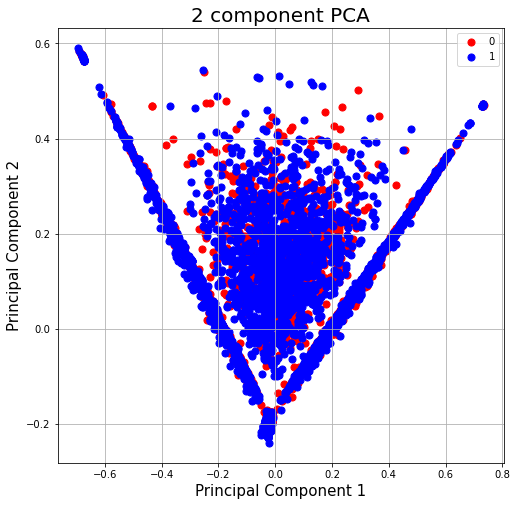

In [26]:
# Principle Component Analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(newDf)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['pol']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['pol'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

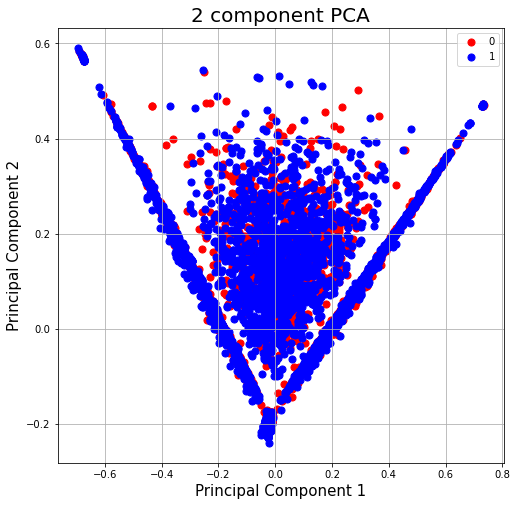

In [48]:
scores = cross_val_score(model, X=X_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
print('Classification report on train data')
print(clf_report)

CV accuracy scores: [0.72925311 0.74273859 0.73962656 0.7126556  0.73651452 0.72821577
 0.73651452 0.75414938 0.73443983 0.73340249]
CV accuracy: 0.735 +/- 0.010
Classification report on train data
              precision    recall  f1-score   support

           0       0.95      0.53      0.68      3395
           1       0.79      0.98      0.88      6245

    accuracy                           0.82      9640
   macro avg       0.87      0.76      0.78      9640
weighted avg       0.85      0.82      0.81      9640



In [13]:
all_lib_unigrams_stemm
# all_con_unigrams_stemm_df

[('trump', 518),
 ('new', 443),
 ('democrat', 413),
 ('biden', 386),
 ('social', 370),
 ('sai', 308),
 ('worker', 299),
 ('peopl', 298),
 ('right', 282),
 ('state', 270),
 ('vote', 262),
 ('women', 252),
 ('elect', 248),
 ('republican', 227),
 ('year', 209),
 ('parti', 205),
 ('socialist', 204),
 ('war', 201),
 ('work', 196),
 ('american', 194),
 ('hous', 192),
 ('democraci', 183),
 ('america', 176),
 ('white', 169),
 ('like', 168),
 ('gop', 166),
 ('union', 164),
 ('ukrain', 162),
 ('polit', 161),
 ('communist', 160),
 ('want', 157),
 ('need', 152),
 ('think', 152),
 ('presid', 152),
 ('support', 151),
 ('opinion', 151),
 ('time', 150),
 ('black', 148),
 ('capit', 146),
 ('make', 139),
 ('court', 137),
 ('dai', 133),
 ('countri', 131),
 ('protest', 128),
 ('help', 123),
 ('senat', 120),
 ('plan', 118),
 ('left', 117),
 ('world', 117),
 ('fight', 115),
 ('law', 115),
 ('chang', 113),
 ('report', 113),
 ('liber', 111),
 ('polic', 110),
 ('govern', 108),
 ('texa', 106),
 ('tax', 106),
 (

In [15]:
total_col_uni = []
for uni, count in all_con_unigrams_stemm:
    total_col_uni.append(all_unigrams_stemm_df.query("Unigram == @uni")['Count'].iloc[0])

total_col_bi = []
for bi, count in all_con_bigrams_stemm:
    total_col_bi.append(all_bigrams_stemm_df.query("Bigram == @bi")['Count'].iloc[0])
    

total_col_tri = []
for tri, count in all_con_trigrams_stemm:
    total_col_tri.append(all_trigrams_stemm_df.query("Trigram == @tri")['Count'].iloc[0])
    
all_con_unigrams_stemm_df['Total_count'] = total_col_uni
all_con_unigrams_stemm_df['pmi'] = np.log10((all_con_unigrams_stemm_df['Count'] / total_num_con_unigrams_stemm)/(0.5 * all_con_unigrams_stemm_df['Total_count']/total_num_unigrams_stemm))
all_con_unigrams_stemm_df['lmi'] = all_con_unigrams_stemm_df['pmi']*(all_con_unigrams_stemm_df['Count']/total_num_unigrams_stemm)
print(all_con_unigrams_stemm_df.sort_values(ascending=False, by=['lmi']).head(30))


all_con_bigrams_stemm_df['Total_count'] = total_col_bi
all_con_bigrams_stemm_df['pmi'] = np.log10((all_con_bigrams_stemm_df['Count'] / total_num_bigrams_stemm)/(0.5 * all_con_bigrams_stemm_df['Total_count']/total_num_bigrams_stemm))
all_con_bigrams_stemm_df['lmi'] = all_con_bigrams_stemm_df['pmi']*(all_con_bigrams_stemm_df['Count']/total_num_bigrams_stemm)
print(all_con_bigrams_stemm_df.sort_values(ascending=False, by=['lmi']).head(30))


all_con_trigrams_stemm_df['Total_count'] = total_col_tri
all_con_trigrams_stemm_df['pmi'] = np.log10((all_con_trigrams_stemm_df['Count'] / total_num_trigrams_stemm)/(0.5 * all_con_trigrams_stemm_df['Total_count']/total_num_trigrams_stemm))
all_con_trigrams_stemm_df['lmi'] = all_con_trigrams_stemm_df['pmi']*(all_con_trigrams_stemm_df['Count']/total_num_trigrams_stemm)
print(all_con_trigrams_stemm_df.sort_values(ascending=False, by=['lmi']).head(30))


        Unigram  Count  Total_count       pmi       lmi
0         trump    483         1001  1.038902  0.005113
1         biden    423          809  1.073781  0.004628
2        ukrain    335          497  1.184078  0.004042
3         capit    237          383  1.146939  0.002770
4        russia    223          322  1.195838  0.002717
6         putin    195          263  1.225468  0.002435
5           sai    199          507  0.949234  0.001925
12  libertarian    130          139  1.326318  0.001757
11      desanti    132          160  1.271843  0.001711
10      russian    140          208  1.183454  0.001688
8         peopl    173          471  0.920414  0.001622
7           new    188          631  0.829518  0.001589
17         poll    118          170  1.196822  0.001439
13       govern    122          230  1.080021  0.001343
9         state    144          414  0.896751  0.001316
14       presid    118          270  0.995907  0.001197
24        invas     91          115  1.253733  0

In [128]:
#     numerator = (count / total_num_bigrams_stemm)
#     denominator = (0.5 * all_bigrams_stemm_df[all_bigrams_stemm_df['Bigram'] == bi])
#     pmi = math.log(numerator / denominator)
total_col_uni = []
for uni, count in all_lib_unigrams_stemm:
    total_col_uni.append(all_unigrams_stemm_df.query("Unigram == @uni")['Count'].iloc[0])

total_col_bi = []
for bi, count in all_lib_bigrams_stemm:
    total_col_bi.append(all_bigrams_stemm_df.query("Bigram == @bi")['Count'].iloc[0])
    
total_col_tri = []
for tri, count in all_lib_trigrams_stemm:
    total_col_tri.append(all_trigrams_stemm_df.query("Trigram == @tri")['Count'].iloc[0])

print("Liberals:")
all_lib_unigrams_stemm_df['Total_count'] = total_col_uni
all_lib_unigrams_stemm_df['pmi'] = np.log10((all_lib_unigrams_stemm_df['Count'] / total_num_lib_unigrams_stemm)/(0.5 * (all_lib_unigrams_stemm_df['Total_count']/total_num_unigrams_stemm)))
all_lib_unigrams_stemm_df['lmi'] = all_lib_unigrams_stemm_df['pmi']*(all_lib_unigrams_stemm_df['Count']/total_num_unigrams_stemm)
# all_lib_unigrams_stemm_df['ppmi'] = max(all_lib_unigrams_stemm_df['pmi'], 0)
print(all_lib_unigrams_stemm_df.sort_values(ascending=False, by=['lmi']).head(30))
# print(total_col)
all_lib_bigrams_stemm_df['Total_count'] = total_col_bi
all_lib_bigrams_stemm_df['pmi'] = np.log10((all_lib_bigrams_stemm_df['Count'] / total_num_bigrams_stemm)/(0.5 * (all_lib_bigrams_stemm_df['Total_count']/total_num_bigrams_stemm)))
# all_lib_bigrams_stemm_df['lmi'] = all_lib_bigrams_stemm_df['pmi']*(all_lib_bigrams_stemm_df['Count']/total_num_bigrams_stemm)
# all_lib_bigrams_stemm_df['ppmi'] = max(all_lib_bigrams_stemm_df['pmi'], 0)
print(all_lib_bigrams_stemm_df.sort_values(ascending=False, by=['lmi']).head(50))

all_lib_trigrams_stemm_df['Total_count'] = total_col_tri
all_lib_trigrams_stemm_df['pmi'] = np.log10((all_lib_trigrams_stemm_df['Count'] / total_num_trigrams_stemm)/(0.5 * (all_lib_trigrams_stemm_df['Total_count']/total_num_trigrams_stemm)))
all_lib_trigrams_stemm_df['lmi'] = all_lib_trigrams_stemm_df['pmi']*(all_lib_trigrams_stemm_df['Count']/total_num_trigrams_stemm)
# all_lib_trigrams_stemm_df['ppmi'] = max(all_lib_trigrams_stemm_df['pmi'], 0)
print(all_lib_trigrams_stemm_df.sort_values(ascending=False, by=['lmi']).head(50))

Liberals:
       Unigram  Count  Total_count       pmi       lmi
1          new    443          631  0.730634  0.003298
2     democrat    413          531  0.775116  0.003262
0        trump    518         1001  0.598156  0.003157
4       social    370          487  0.764933  0.002884
6       worker    299          329  0.842735  0.002567
11       women    252          265  0.862415  0.002214
3        biden    386          809  0.562899  0.002214
8        right    282          388  0.745677  0.002143
10        vote    262          317  0.801502  0.002140
5          sai    308          507  0.667803  0.002096
7        peopl    298          471  0.685455  0.002081
12       elect    248          294  0.810364  0.002048
9        state    270          414  0.698624  0.001922
13  republican    227          306  0.754565  0.001745
15       parti    205          232  0.830526  0.001735
16   socialist    204          258  0.782271  0.001626
14        year    209          294  0.736059  0.001567


In [11]:
сon_bigrams = get_top_n_gram(df[df['politicallean'] == "Conservative"]['lematized'],(2,2),10)
lib_bigrams = get_top_n_gram(df[df['politicallean'] == "Liberal"]['lematized'],(2,2),10)


all_bigrams = get_top_n_gram(df['lematized'], (2,2), 10)
print(all_bigrams)
# dfall = pd.DataFrame(all_bigrams, columns = ['Text', 'count', 'Liberal', 'Conservative'])
df1 = pd.DataFrame(сon_bigrams, columns = ['Text' , 'count'])

df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='red', title='Top 10 Bigrams in Conservative titles',orientation='h')

df2 = pd.DataFrame(lib_bigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 10 Bigrams in Liberal titles',orientation='h')


blaze_bigrams = get_top_n_gram(blazedf['lematized'], (2,2),10)

df3 = pd.DataFrame(blaze_bigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 10 Bigrams in BlazeTV titles',orientation='h')


[('supreme court', 111), ('donald trump', 100), ('white house', 93), ('joe biden', 85), ('social democracy', 69), ('ron desantis', 60), ('elon musk', 55), ('fox news', 54), ('voting right', 52), ('new york', 50)]


In [23]:
# def pmi(dff, x, y):
#     df = dff.copy()
#     df['f_x'] = df.groupby(x)[x].transform('count')
#     df['f_y'] = df.groupby(y)[y].transform('count')
#     df['f_xy'] = df.groupby([x, y])[x].transform('count')
#     df['pmi'] = np.log(len(df.index) * df['f_xy'] / (df['f_x'] * df['f_y']) )
#     return df
CountVectorizer(ngram_range=2,stop_words = 'english').fit(df['lematized'])


TypeError: cannot unpack non-iterable int object

In [30]:
# Fitting lematized data
X_train_lema, X_test_lema, y_train_lema, y_test_lema = train_test_split(df['lematized'], df['politicallean'], random_state = 0)
model_lema = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_lema.fit(X_train_lema, y_train_lema)
y_pred_lema = model_lema.predict(X_train_lema)

clf_report = classification_report(y_train_lema, y_pred_lema)
print('Classification report on train data')
print(clf_report)

y2_pred_lema = model_lema.predict(rdf.title)
print("Reddit r/Politics")
# print("Liberal:")
print("Liberal:", (y2_pred_lema == "Liberal").sum())
print("Conservative:", (y2_pred_lema == "Conservative").sum())

print()
y3_pred_lema = model_lema.predict(newsdf.title)
print("Amalgamated news data")
print("Liberal:", (y3_pred_lema == "Liberal").sum())
print("Conservative:",(y3_pred_lema == "Conservative").sum())

print()
y4_pred_lema = model_lema.predict(blazedf.title)
print("blazedf news data")
print("Liberal:", (y4_pred_lema == "Liberal").sum())
print("Conservative:",(y4_pred_lema == "Conservative").sum())

print()
y5_pred_lema = model_lema.predict(cnndf.title)
print("cnndf news data")
print("Liberal:", (y5_pred_lema == "Liberal").sum())
print("Conservative:",(y5_pred_lema == "Conservative").sum())

print()
y6_pred_lema = model_lema.predict(nbcdf.title)
print("nbcdf news data")
print("Liberal:", (y6_pred_lema == "Liberal").sum())
print("Conservative:",(y6_pred_lema == "Conservative").sum())

print()
y7_pred_lema = model_lema.predict(pbsdf.title)
print("pbsdf news data")
print("Liberal:", (y7_pred_lema == "Liberal").sum())
print("Conservative:",(y7_pred_lema == "Conservative").sum())

print()
y8_pred_lema = model_lema.predict(fdf.title)
print("Fox news data")
print("Liberal:", (y8_pred_lema == "Liberal").sum())
print("Conservative:",(y8_pred_lema == "Conservative").sum())

Classification report on train data
              precision    recall  f1-score   support

Conservative       0.96      0.54      0.69      3395
     Liberal       0.80      0.99      0.88      6245

    accuracy                           0.83      9640
   macro avg       0.88      0.77      0.79      9640
weighted avg       0.86      0.83      0.82      9640

Reddit r/Politics
Liberal: 27755
Conservative: 308

Amalgamated news data
Liberal: 80890
Conservative: 6509

blazedf news data
Liberal: 7327
Conservative: 90

cnndf news data
Liberal: 19518
Conservative: 482

nbcdf news data
Liberal: 19996
Conservative: 4

pbsdf news data
Liberal: 4537
Conservative: 17

Fox news data
Liberal: 51049
Conservative: 846


r/Politics


([<matplotlib.patches.Wedge at 0x17c27aa08d0>,
 [Text(-1.0993461888715155, 0.03792040365916776, 'Liberal'),
  Text(1.09934618942626, -0.03792038757663305, 'Conservative')])

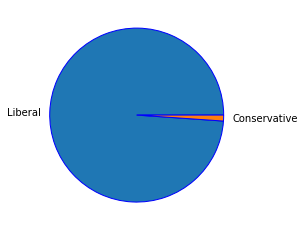

In [23]:
y2_lib = (y2_pred_lema == "Liberal").sum()
y2_con = (y2_pred_lema == "Conservative").sum()
total = len(y2_pred_lema)
labels = ['Liberal', 'Conservative']
slices = [y2_lib/total, y2_con/total]
colors = ['blue', 'red']
print("r/Politics")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'})

BlazeTV


([<matplotlib.patches.Wedge at 0x17c27aed9b0>,
 [Text(-1.070029380029471, 0.2550237751146868, 'Liberal'),
  Text(1.070029397937255, -0.2550236999771505, 'Conservative')])

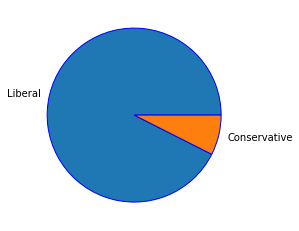

In [24]:
y3_lib = (y3_pred_lema == "Liberal").sum()
y3_con = (y3_pred_lema == "Conservative").sum()
total = len(y3_pred_lema)
labels = ['Liberal', 'Conservative']
slices = [y3_lib/total, y3_con/total]
colors = ['blue', 'red']
print("BlazeTV")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'})

CNN


([<matplotlib.patches.Wedge at 0x17c27b3ea58>,
 [Text(-1.0992008279827727, 0.04192302186134775, 'Liberal'),
  Text(1.0992008243029716, -0.04192311834379381, 'Conservative')])

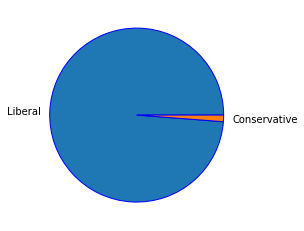

In [25]:
y4_lib = (y4_pred_lema == "Liberal").sum()
y4_con = (y4_pred_lema == "Conservative").sum()
total = len(y4_pred_lema)
labels = ['Liberal', 'Conservative']
slices = [y4_lib/total, y4_con/total]
colors = ['blue', 'red']
print("CNN")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'})

PBS


([<matplotlib.patches.Wedge at 0x17c27bdbb70>,
 [Text(-1.0968487036124515, 0.08320409475311381, 'Liberal'),
  Text(1.0968487021518019, -0.08320411400831107, 'Conservative')])

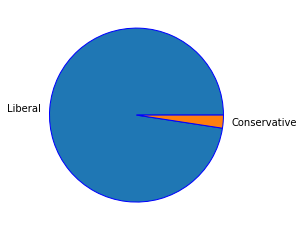

In [27]:
y5_lib = (y5_pred_lema == "Liberal").sum()
y5_con = (y5_pred_lema == "Conservative").sum()
total = len(y5_pred_lema)
labels = ['Liberal', 'Conservative']
slices = [y5_lib/total, y5_con/total]
colors = ['blue', 'red']
print("PBS")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'})

Fox


([<matplotlib.patches.Wedge at 0x17c2a1d6e10>,
 [Text(-1.0985576911995218, 0.05631162496657784, 'Liberal'),
  Text(1.0985576875748304, -0.05631169567897332, 'Conservative')])

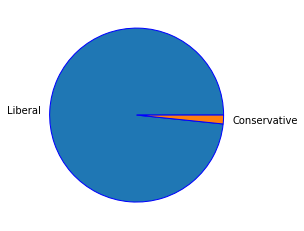

In [31]:
y8_lib = (y8_pred_lema == "Liberal").sum()
y8_con = (y8_pred_lema == "Conservative").sum()
total = len(y8_pred_lema)
labels = ['Liberal', 'Conservative']
slices = [y8_lib/total, y8_con/total]
colors = ['blue', 'red']
print("Fox")
plt.pie(slices, labels = labels, wedgeprops = {'edgecolor' : 'blue'})

In [37]:
y_pred_lema = model_lema.predict(X_test_lema)

clf_report = classification_report(y_test_lema,y_pred_lema)
print('Classification report on test data')
print(clf_report)

Classification report on test data
              precision    recall  f1-score   support

Conservative       0.82      0.33      0.48      1140
     Liberal       0.72      0.96      0.83      2074

    accuracy                           0.74      3214
   macro avg       0.77      0.65      0.65      3214
weighted avg       0.76      0.74      0.70      3214



In [30]:
# Fitting stemmed data
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(df['stemmed'], df['PoliticalLean'], random_state = 0)
model_stem = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_stem.fit(X_train_stem, y_train_stem)
y_pred_stem = model_lema.predict(X_train_stem)

clf_report = classification_report(y_train_stem, y_pred_stem)
print('Classification report on train data')
print(clf_report)

Classification report on train data
              precision    recall  f1-score   support

Conservative       0.94      0.39      0.55      3395
     Liberal       0.75      0.99      0.85      6245

    accuracy                           0.78      9640
   macro avg       0.84      0.69      0.70      9640
weighted avg       0.81      0.78      0.75      9640



In [38]:
y_pred_stem = model_lema.predict(X_test_stem)

clf_report = classification_report(y_test_stem, y_pred_stem)
print('Classification report on test data')
print(clf_report)

Classification report on test data
              precision    recall  f1-score   support

Conservative       0.81      0.27      0.40      1140
     Liberal       0.71      0.97      0.82      2074

    accuracy                           0.72      3214
   macro avg       0.76      0.62      0.61      3214
weighted avg       0.74      0.72      0.67      3214

